In [15]:
import yfinance as yf

# Download Tesla stock data
tesla_data = yf.download('TSLA')

# Reset the index
tesla_data_reset = tesla_data.reset_index()

# Display the first 5 rows of the dataframe
print(tesla_data_reset.head())


[*********************100%***********************]  1 of 1 completed

        Date      Open      High       Low     Close  Adj Close     Volume
0 2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
1 2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2 2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
4 2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500


In [26]:
import requests

# Send an HTTP request to the URL
html = requests.get('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm')

# Extract the content as text
html_data = html.text

# Now you can proceed with parsing or analyzing `html_data`
print(html_data)  # For example, print the HTML content to check


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
		<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>
		<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla r

In [27]:
soup = BeautifulSoup(html_data, 'html5lib')

In [28]:
tables = soup.find_all("table")

for i, table in enumerate (tables):
    if ("Tesla Quarterly Revenue" in str(table)):
        table_index = i

table_index

1

In [29]:
import yfinance as yf
import pandas as pd

# Fetch Tesla stock data
tesla = yf.Ticker("TSLA")

# Get Tesla's quarterly financials, which includes revenue data
tesla_financials = tesla.quarterly_financials

# Transpose the financials DataFrame for easier access
tesla_financials = tesla_financials.T

# Check if 'Total Revenue' is a column in the financials
if 'Total Revenue' in tesla_financials.columns:
    # Extract the 'Total Revenue' column and reset the index to store as a DataFrame
    tesla_revenue = tesla_financials[['Total Revenue']].reset_index()

    # Rename columns for clarity
    tesla_revenue.columns = ['Date', 'Revenue']

    # Display the last five rows of the tesla_revenue DataFrame
    print(tesla_revenue.tail())
else:
    print("Revenue data not found.")


        Date        Revenue
2 2023-12-31  25167000000.0
3 2023-09-30  23350000000.0
4 2023-06-30  24927000000.0
5 2023-03-31            NaN
6 2022-12-31            NaN


In [30]:
import yfinance as yf
import pandas as pd

# Fetch GameStop (GME) stock data
gme_data = yf.download("GME", start="2010-01-01", end="2023-12-31")

# Reset the index
gme_data_reset = gme_data.reset_index()

# Display the first five rows of the DataFrame
print(gme_data_reset.head())

# Optionally, save the data to a CSV file
gme_data_reset.to_csv("gme_data.csv", index=False)


[*********************100%***********************]  1 of 1 completed

        Date    Open    High     Low   Close  Adj Close     Volume
0 2010-01-04  5.5175  5.7375  5.5000  5.7250   3.854644   26702800
1 2010-01-05  5.7275  5.9350  5.7250  5.8800   3.959005   21269600
2 2010-01-06  5.8650  6.0250  5.8050  6.0075   4.044851   21471200
3 2010-01-07  5.0025  5.2925  4.8550  5.1150   3.443930  164761200
4 2010-01-08  5.1600  5.3075  5.0575  5.0725   3.415314   47872400


In [31]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of GameStop (GME) revenue data on Yahoo Finance
url = 'https://finance.yahoo.com/quote/GME/financials'

# Send a GET request to fetch the webpage content
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the webpage content using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the table containing the revenue data
    # Yahoo Finance might use specific classes or IDs for tables; this needs inspection
    tables = soup.find_all('table')

    # Find the correct table based on its content
    revenue_table = None
    for table in tables:
        headers = table.find_all('th')
        if any('Total Revenue' in header.text for header in headers):
            revenue_table = table
            break

    if revenue_table:
        # Extract all rows from the table
        rows = revenue_table.find_all('tr')

        # Create a list to store the table data
        revenue_data = []

        for row in rows:
            cols = row.find_all('td')
            cols = [ele.text.strip() for ele in cols]
            revenue_data.append([ele for ele in cols if ele])  # Get rid of empty values

        # Convert the list into a pandas DataFrame
        gme_revenue = pd.DataFrame(revenue_data, columns=['Date', 'Revenue'])

        # Reset index and display the last 5 rows
        gme_revenue = gme_revenue.reset_index(drop=True)
        print(gme_revenue.tail())
    else:
        print("Revenue table not found.")
else:
    print("Failed to retrieve the page.")


Failed to retrieve the page.


In [32]:
import yfinance as yf
import pandas as pd

# Fetch GameStop (GME) stock data
gme = yf.Ticker("GME")

# Get GameStop's quarterly financials, which includes revenue data
gme_financials = gme.quarterly_financials

# Transpose the data to make it more readable
gme_financials = gme_financials.T

# Extract the 'Total Revenue' column and reset the index to store as a DataFrame
if 'Total Revenue' in gme_financials.columns:
    gme_revenue = gme_financials[['Total Revenue']].reset_index()
    gme_revenue.columns = ['Date', 'Revenue']

    # Display the last 5 rows of the gme_revenue DataFrame
    print(gme_revenue.tail())
else:
    print("Revenue data not found.")


        Date       Revenue
1 2024-01-31  1793600000.0
2 2023-10-31  1078300000.0
3 2023-07-31  1163800000.0
4 2023-04-30  1237100000.0
5 2023-01-31           NaN


[*********************100%***********************]  1 of 1 completed


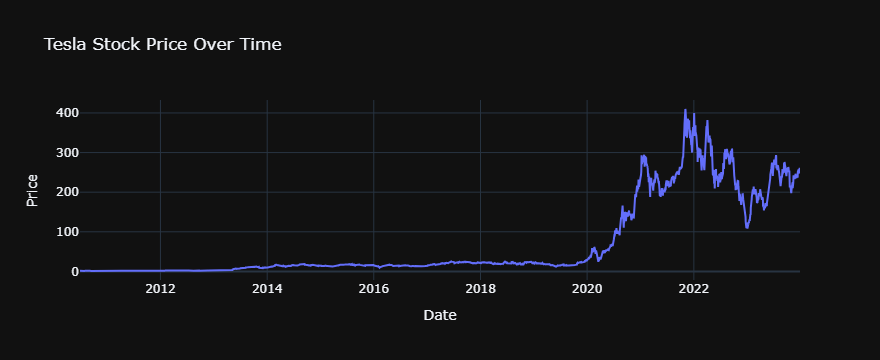

In [34]:
import yfinance as yf
import plotly.graph_objects as go

# Fetch Tesla (TSLA) stock data
tesla_data = yf.download("TSLA", start="2010-01-01", end="2023-12-31")

# Reset the index to make 'Date' a column
tesla_data_reset = tesla_data.reset_index()

# Define the plotting function using plotly
def make_graph(data, title='Tesla Stock Price'):
    """
    Plots the stock data with a title using plotly.
    
    Parameters:
        data (pd.DataFrame): DataFrame containing the stock data with a 'Date' column and a 'Close' column.
        title (str): Title of the graph.
    """
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data['Date'], y=data['Close'], mode='lines', name='Close Price'))
    fig.update_layout(title=title, xaxis_title='Date', yaxis_title='Price', template='plotly_dark')
    fig.show()

# Use the make_graph function to plot Tesla stock data
make_graph(tesla_data_reset, title='Tesla Stock Price Over Time')


[*********************100%***********************]  1 of 1 completed


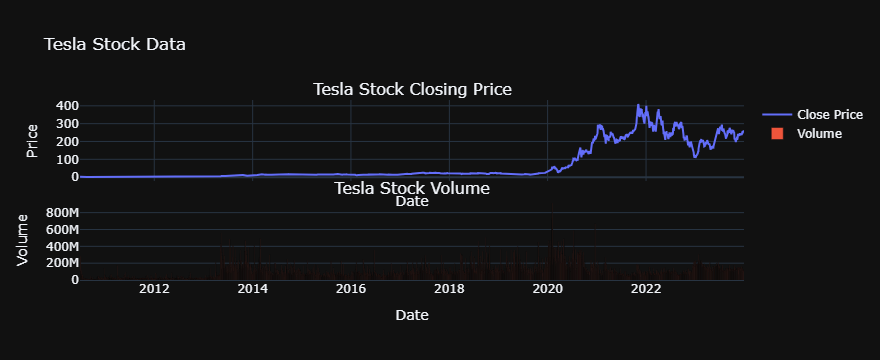

In [36]:
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Fetch Tesla (TSLA) stock data
tesla_data = yf.download("TSLA", start="2010-01-01", end="2023-12-31")

# Reset the index to make 'Date' a column
tesla_data_reset = tesla_data.reset_index()

# Define the plotting function using plotly
def make_graph(data, title1='Tesla Stock Closing Price', title2='Tesla Stock Volume'):
    """
    Plots two types of stock data with titles using plotly.
    
    Parameters:
        data (pd.DataFrame): DataFrame containing the stock data with 'Date', 'Close', and 'Volume' columns.
        title1 (str): Title for the closing price plot.
        title2 (str): Title for the volume plot.
    """
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                        subplot_titles=(title1, title2), 
                        vertical_spacing=0.1)

    # Add Closing Price Trace
    fig.add_trace(go.Scatter(x=data['Date'], y=data['Close'], mode='lines', name='Close Price'), 
                  row=1, col=1)

    # Add Volume Trace
    fig.add_trace(go.Bar(x=data['Date'], y=data['Volume'], name='Volume'), 
                  row=2, col=1)

    # Update Layout
    fig.update_layout(title='Tesla Stock Data',
                      xaxis_title='Date',
                      yaxis_title='Price',
                      xaxis2_title='Date',
                      yaxis2_title='Volume',
                      template='plotly_dark')

    fig.show()

# Use the make_graph function to plot Tesla stock data
make_graph(tesla_data_reset)


[*********************100%***********************]  1 of 1 completed


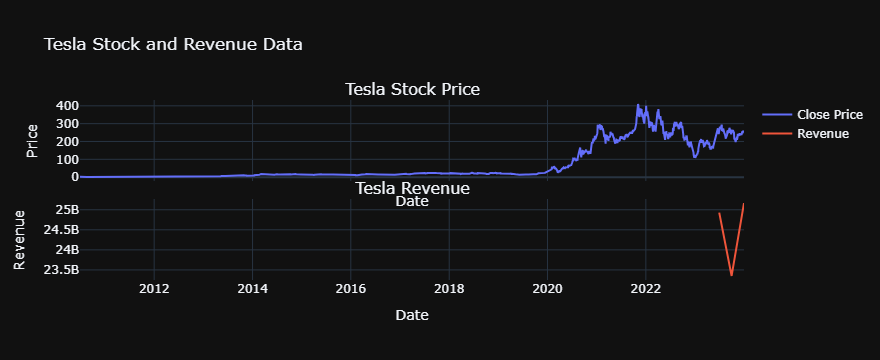

In [43]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def make_graph(stock_data, revenue_data, title='Tesla'):
    """
    Plots stock data and revenue data with a title using plotly.
    
    Parameters:
        stock_data (pd.DataFrame): DataFrame containing stock data with 'Date' and 'Close' columns.
        revenue_data (pd.DataFrame): DataFrame containing revenue data with 'Date' and 'Revenue' columns.
        title (str): Title of the graph.
    """
    # Create subplots
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                        subplot_titles=(f'{title} Stock Price', f'{title} Revenue'), 
                        vertical_spacing=0.1)

    # Add Closing Price Trace
    fig.add_trace(go.Scatter(x=stock_data['Date'], y=stock_data['Close'], mode='lines', name='Close Price'), 
                  row=1, col=1)

    # Add Revenue Trace as Line Plot
    fig.add_trace(go.Scatter(x=revenue_data['Date'], y=revenue_data['Revenue'], mode='lines', name='Revenue'), 
                  row=2, col=1)

    # Update Layout
    fig.update_layout(title=f'{title} Stock and Revenue Data',
                      xaxis_title='Date',
                      yaxis_title='Price',
                      xaxis2_title='Date',
                      yaxis2_title='Revenue',
                      template='plotly_dark')

    fig.show()

# Example usage
# Fetch Tesla (TSLA) stock data
tesla_data = yf.download("TSLA", start="2010-01-01", end="2023-12-31")
tesla_data_reset = tesla_data.reset_index()

# Define Tesla revenue data manually or load it as appropriate
tesla_revenue = pd.DataFrame({
    'Date': ['2023-12-31', '2023-09-30', '2023-06-30', '2023-03-31', '2022-12-31'],
    'Revenue': [25167000000.0, 23350000000.0, 24927000000.0, None, None]
})

# Ensure 'Date' is in datetime format
tesla_data_reset['Date'] = pd.to_datetime(tesla_data_reset['Date'])
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# Call the make_graph function
make_graph(tesla_data_reset, tesla_revenue, 'Tesla')


                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


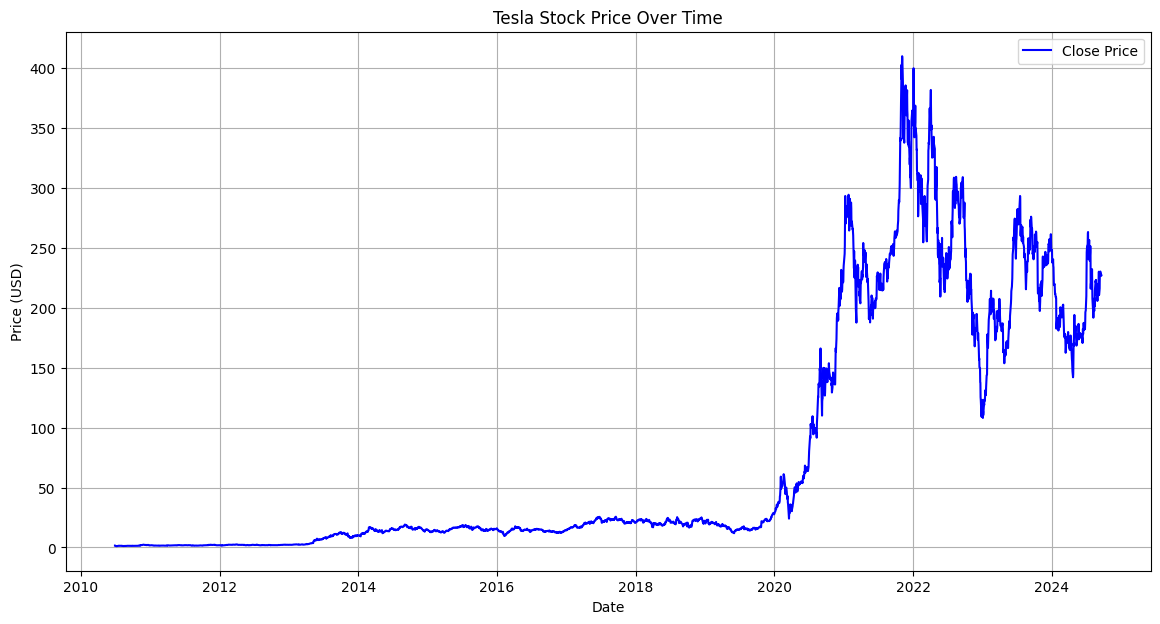

In [45]:
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Print the first few rows of data for verification
print(tesla_data.head())

# Define the make_graph function
def make_graph(data, title):
    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data['Close'], label='Close Price', color='blue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the Tesla stock data
make_graph(tesla_data, "Tesla Stock Price Over Time")

                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578048  1.607505   7410400   
2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


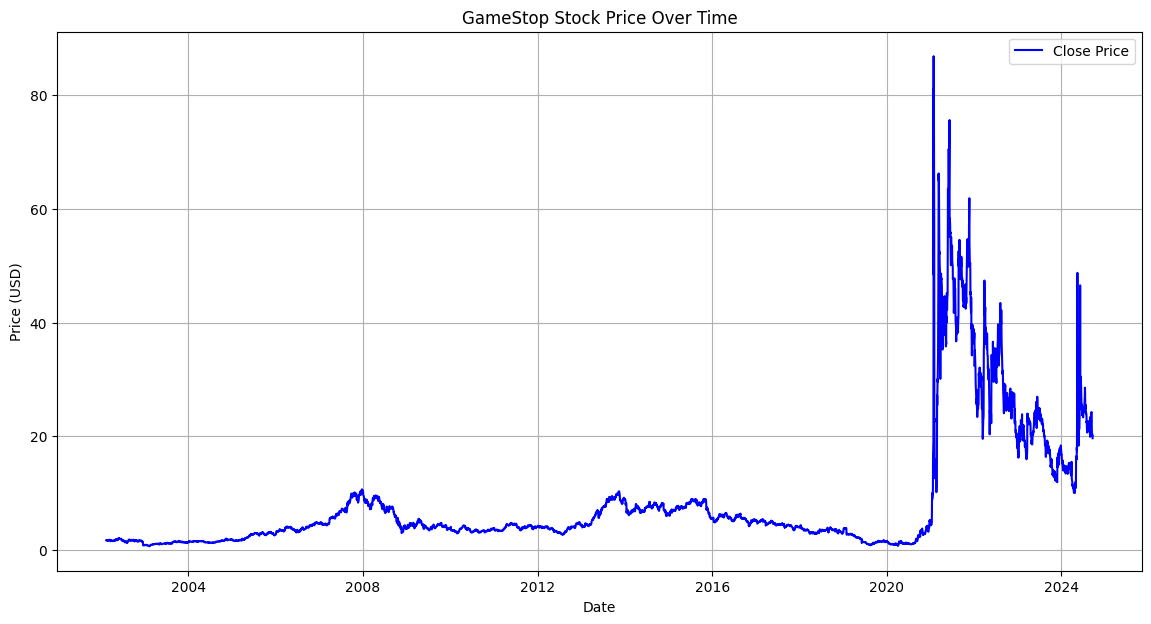

In [49]:
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Print the first few rows of data for verification
print(gme_data.head())

# Define the make_graph function
def make_graph(data, title):
    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data['Close'], label='Close Price', color='blue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the GameStop stock data
make_graph(gme_data, "GameStop Stock Price Over Time")


                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


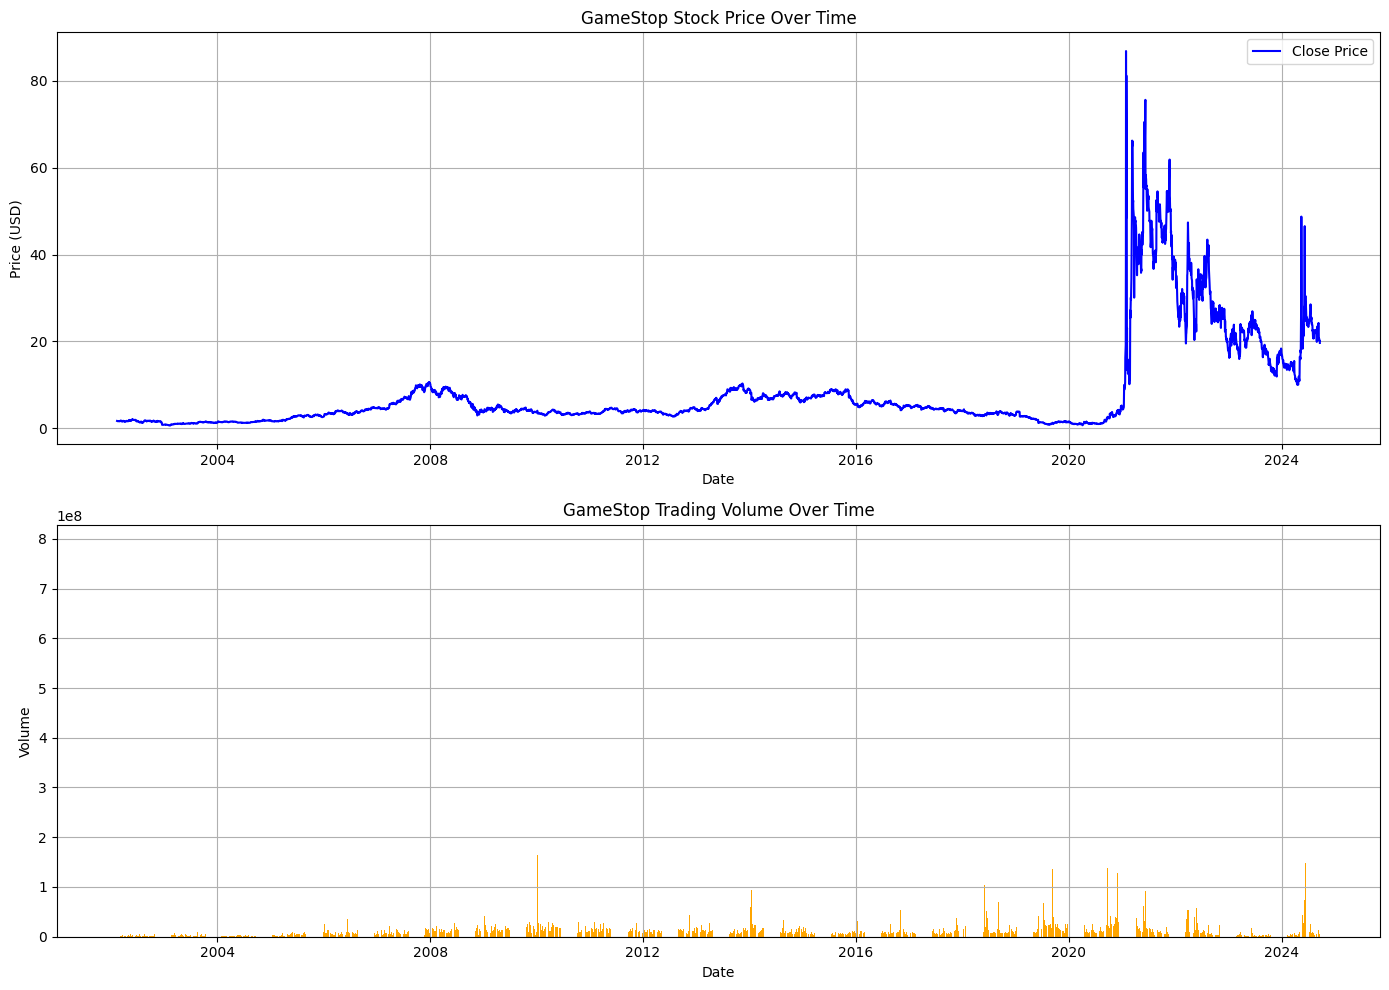

In [50]:
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Print the first few rows of data for verification
print(gme_data.head())

# Define the make_graph function
def make_graph(data, title1, title2):
    plt.figure(figsize=(14, 10))
    
    # Plot 1: Closing Price
    plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
    plt.plot(data.index, data['Close'], label='Close Price', color='blue')
    plt.title(title1)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    
    # Plot 2: Volume
    plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
    plt.bar(data.index, data['Volume'], color='orange')
    plt.title(title2)
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Plot the GameStop stock data
make_graph(gme_data, "GameStop Stock Price Over Time", "GameStop Trading Volume Over Time")


                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683251  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603296  1.662209   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


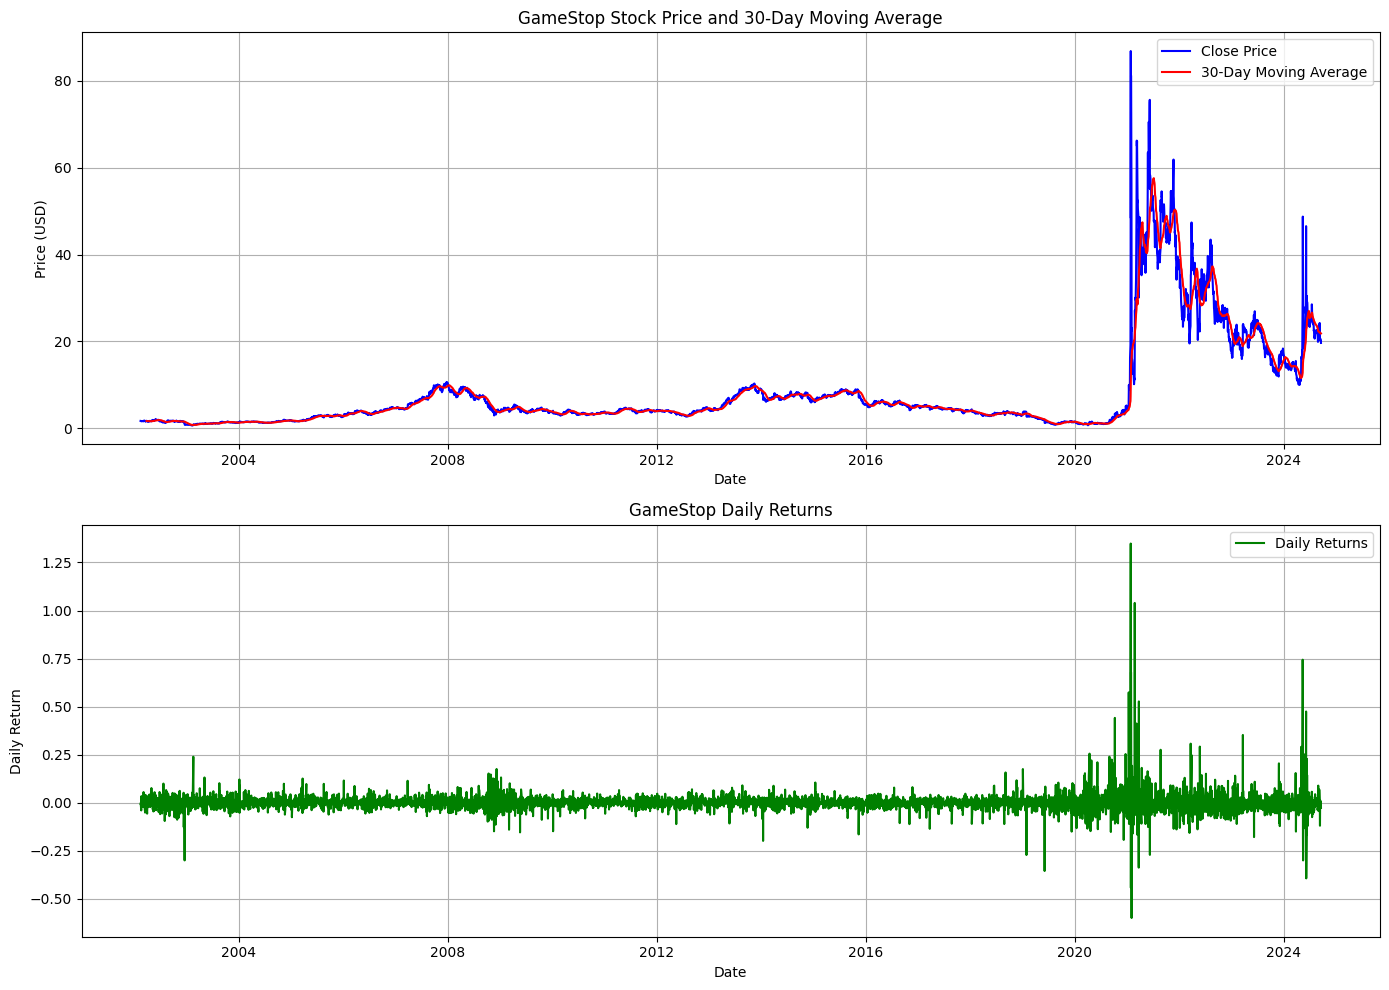

In [52]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Fetch GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Print the first few rows of data for verification
print(gme_data.head())

# Calculate moving average
gme_data['SMA_30'] = gme_data['Close'].rolling(window=30).mean()  # 30-day simple moving average

# Define the make_graph function
def make_graph(data, title1, title2):
    plt.figure(figsize=(14, 10))
    
    # Plot 1: Closing Price and Moving Average
    plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
    plt.plot(data.index, data['Close'], label='Close Price', color='blue')
    plt.plot(data.index, data['SMA_30'], label='30-Day Moving Average', color='red')
    plt.title(title1)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    
    # Plot 2: Daily Returns
    data['Daily_Return'] = data['Close'].pct_change()  # Daily percentage change
    plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
    plt.plot(data.index, data['Daily_Return'], label='Daily Returns', color='green')
    plt.title(title2)
    plt.xlabel('Date')
    plt.ylabel('Daily Return')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Plot the GameStop stock data
make_graph(gme_data, "GameStop Stock Price and 30-Day Moving Average", "GameStop Daily Returns")
